Please checkout the general introduction to xcube data stores in the Jupyter Notebook Getting Started before jumping into this notebook :)

This notebook provides a walk-through demonstrating how to use xcube and the xcube-cmems plugin to read and explore data from the CMEMS API.

In order to run this notebook you need to install the xcube_cmems plugin. You may do so by executing the following line in your terminal:

``` $  conda install -c conda-forge xcube-cmems ```

Or you can install the xcube_cmems plugin from sources by following the instructions on https://github.com/dcs4cop/xcube-cmems.

In [1]:
import os
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
import shapely.geometry
from IPython.display import JSON
import matplotlib.pyplot as plt

#### Check whether the `cmems` store is among the available stores, if not please follow the installation information from the top of this notebook. 

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

In [3]:
get_data_store_params_schema('cmems')

#### set `CMEMS_USER` and `CMEMS_PASSWORD` as environment variables

In [4]:
# os.environ["CMEMS_USER"] =  ""
# os.environ["CMEMS_PASSWORD"] = ""

In [5]:
datastore_params = {'cmems_user': os.getenv('CMEMS_USER'), 'cmems_user_password': os.getenv('CMEMS_PASSWORD')}

In [7]:
store = new_data_store('cmems', **datastore_params)
store

#### Get all the data ids in `cmems` datastore

In [8]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>

#### Get more info about a specific dataset. This includes a description of the possible open formats:

In [9]:
store.describe_data('dataset-bal-analysis-forecast-wav-hourly')

#### Which parameters must be passsed or are available to open the dataset? 

In [10]:
store.get_open_data_params_schema('dataset-bal-analysis-forecast-wav-hourly')

#### The dataset can be opened by giving variables_names, time_range and bbox as params. But note that none of them are mandatory

In [11]:
dataset = store.open_data('dataset-bal-analysis-forecast-wav-hourly', 
                          variable_names=['VHM0'], 
                          bbox=[9, 53, 20, 62], 
                          time_range=('2022-01-01','2022-01-05'))
dataset

<xarray.Dataset>
Dimensions:  (time: 120, lat: 540, lon: 396)
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 61.94 61.96 61.97 61.99
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 19.9 19.93 19.96 19.99
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-01-05T23:00:00
Data variables:
    VHM0     (time, lat, lon) float32 dask.array<chunksize=(1, 481, 396), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.0
    source:                 FMI-WAM_CMEMS
    institution:            Baltic MFC, PU Finnish Meteorological Institute
    title:                  CMEMS WAM model fields (hourly)
    cmems_product_id:       BALTICSEA_ANALYSISFORECAST_WAV_003_010
    westernmost_longitude:  9.0138
    easternmost_longitude:  30.2080
    southernmost_latitude:  53.0083
    northernmost_latitude:  65.9081
    grid_resolution:        1 nautical mile (ie. 0.0167 degrees northward; 0....

In [12]:
dataset.VHM0

<xarray.DataArray 'VHM0' (time: 120, lat: 540, lon: 396)>
dask.array<getitem, shape=(120, 540, 396), dtype=float32, chunksize=(4, 481, 396), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 61.94 61.96 61.97 61.99
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 19.9 19.93 19.96 19.99
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-01-05T23:00:00
Attributes:
    long_name:      Spectral significant wave height (Hm0)
    standard_name:  sea_surface_wave_significant_height
    units:          m
    valid_min:      0.0
    valid_max:      20.0

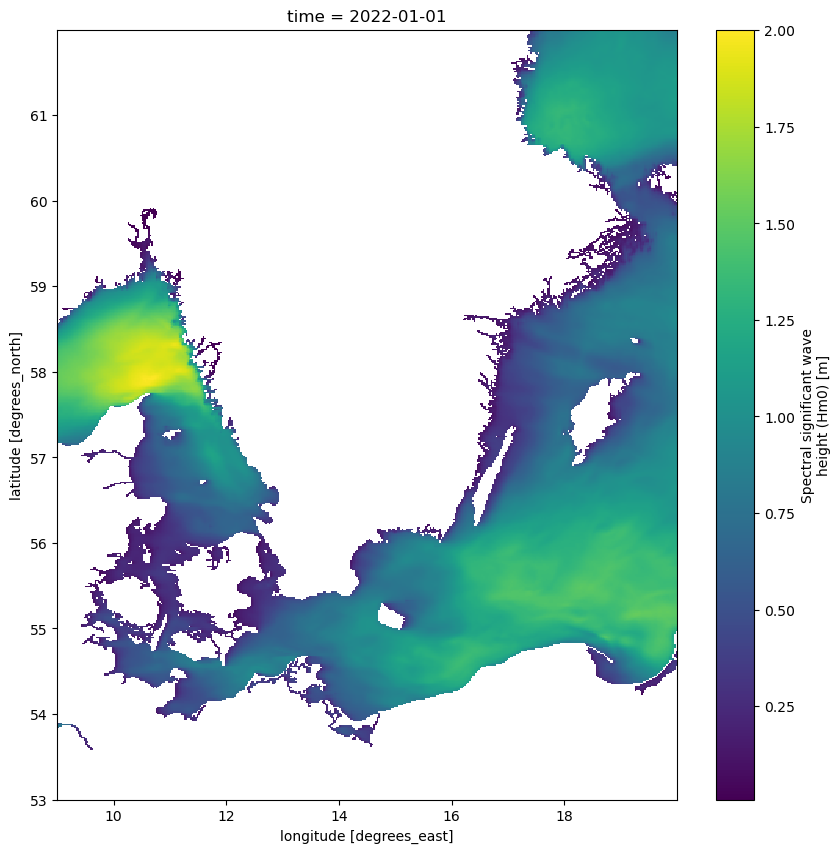

In [13]:
dataset.VHM0[0].plot(figsize=(10, 10))